# Importation de la base de données

In [1]:
import pandas
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

In [2]:
data = pandas.read_excel("Résultats de lenquete.xlsx")

In [3]:
data.shape

(10728, 28)

Traitement des données manquantes

In [4]:
data.dropna()

,GROUPE,ENQUETE,SP,ID,MOTIF,PREM_CLASSE,TICKET,QUI,BAGAGES,AGE,...,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_PLACES,CAR_TT,CAR_CO,CHOICE
0,2,0,1,1,1,0,1,1,0,3,...,112,48,120,63,52,20,0,117,65,2
1,2,0,1,1,1,0,1,1,0,3,...,103,48,30,60,49,10,0,117,84,2
2,2,0,1,1,1,0,1,1,0,3,...,130,48,60,67,58,30,0,117,52,2
3,2,0,1,1,1,0,1,1,0,3,...,103,40,30,63,52,20,0,72,52,2
4,2,0,1,1,1,0,1,1,0,3,...,130,36,60,63,42,20,0,90,84,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,3,1,1,1192,4,1,7,1,0,5,...,148,13,30,93,17,30,0,156,56,2
10724,3,1,1,1192,4,1,7,1,0,5,...,148,12,30,96,16,10,0,96,70,3
10725,3,1,1,1192,4,1,7,1,0,5,...,148,16,60,93,16,20,0,96,56,3
10726,3,1,1,1192,4,1,7,1,0,5,...,178,16,30,96,17,30,0,96,91,2


# Nettoyage de la base de données

In [5]:
dt = data [['AGE','SEXE','REVENU','MOTIF','CHOICE','GROUPE','BAGAGES','ABONNEMENT']]


In [6]:
df = data [['AGE','SEXE','REVENU']]


In [7]:
data['AGE'].replace([1,2,3,4,5,6],['âge infèrieur à 24 ans','âge entre 24 et 39 ans','âge entre 39 et 54 ans','âge entre 54 et 65 ans','âge supérieur à 65 ans','âge inconnu'], inplace=True)
data['SEXE'].replace([1,0],['Homme','Femme'], inplace=True)
data['REVENU'].replace([0,1,2,3,4],['Inférieur à 50','Inférieur à 50','Entre 50 et 100','Plus que 100','Inconnu'], inplace=True)
data['BAGAGES'].replace([0,1,2],['pas de bagages','Un bagage','plusieurs bagages'],inplace=True)
data['ABONNEMENT'].replace([0,1],['possède un abonnement','ne possède pas un abonnement'],inplace=True)
data['CHOICE'].replace([0,1,2,3],['Inconnu','Train','SM','VP'],inplace=True)
data['GROUPE'].replace([2,3],['Passagers de train','Conducteurs VP'], inplace=True)
data['MOTIF'].replace([1,2,3,4,5,6,7,8,9],['Domicile-Travail','Domicile-Shopping','Domicile - Affaires','Domicile - Loisir','Travail-Domicile','Shopping-Domicile','Affaires-Domicile','Loisirs-Domicile','Autres'], inplace=True)

# Statistiques

In [8]:
data['AGE'].value_counts()

âge entre 39 et 54 ans    3834
âge entre 24 et 39 ans    3339
âge entre 54 et 65 ans    2025
âge supérieur à 65 ans     810
âge infèrieur à 24 ans     711
âge inconnu                  9
Name: AGE, dtype: int64

In [9]:
data['SEXE'].value_counts()

Homme    8046
Femme    2682
Name: SEXE, dtype: int64

In [10]:
data.REVENU.value_counts()

Plus que 100       4041
Entre 50 et 100    3744
Inférieur à 50     2025
Inconnu             918
Name: REVENU, dtype: int64

In [11]:
data.AGE.describe().T

count                      10728
unique                         6
top       âge entre 39 et 54 ans
freq                        3834
Name: AGE, dtype: object

In [12]:
data.SEXE.describe().T

count     10728
unique        2
top       Homme
freq       8046
Name: SEXE, dtype: object

In [13]:
data.REVENU.describe().T

count            10728
unique               4
top       Plus que 100
freq              4041
Name: REVENU, dtype: object

In [17]:
data.MOTIF.describe().T

count                   10728
unique                      9
top       Domicile - Affaires
freq                     5193
Name: MOTIF, dtype: object

# DATAVIZUALISATION

Text(0, 0.5, 'Count')

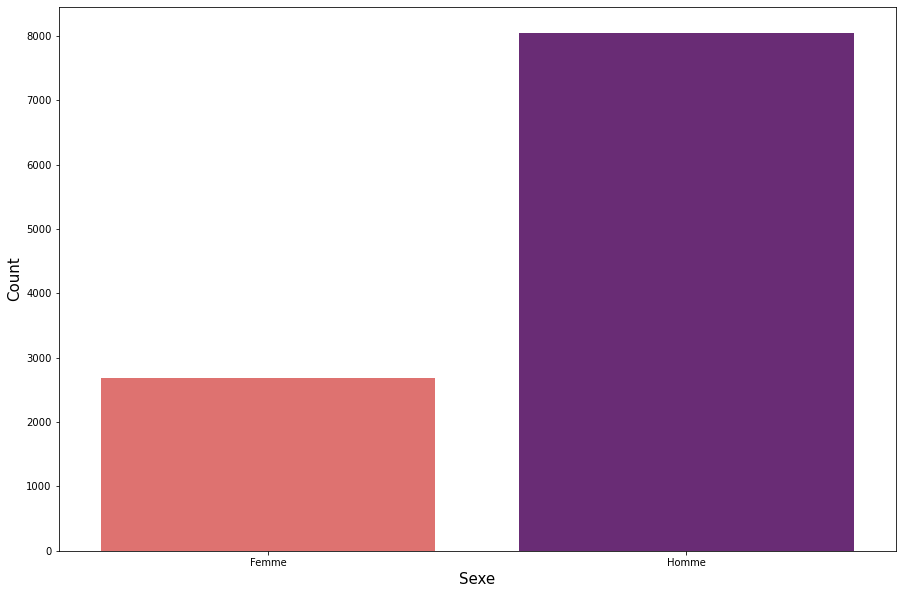

In [64]:
plt.figure(figsize=(15,10))
g = sns.countplot(x='SEXE', data=data,palette='magma_r')
g.set_title("",fontsize=20)
g.set_xlabel("Sexe",fontsize=15)
g.set_ylabel("Count",fontsize=15)

Text(0, 0.5, 'Count')

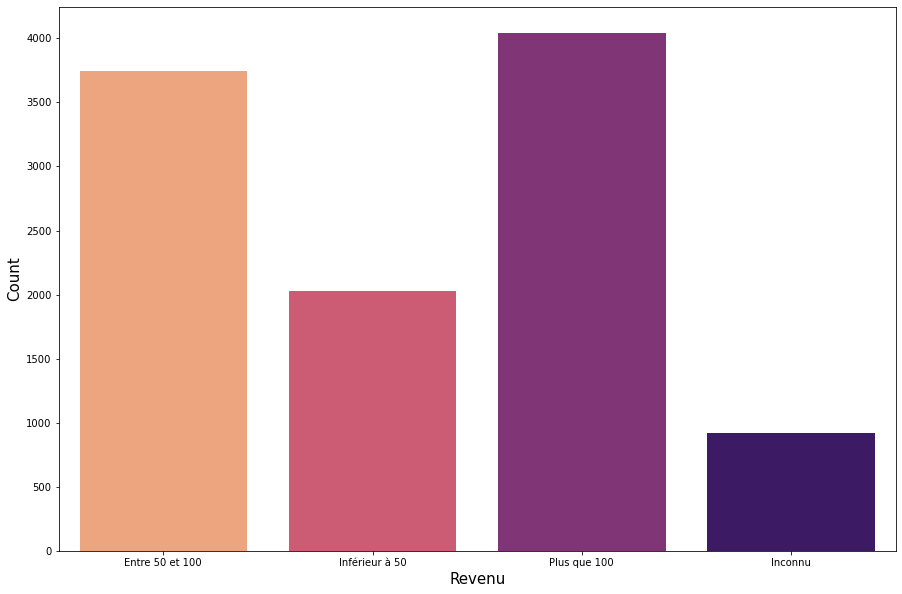

In [15]:
plt.figure(figsize=(15,10))
g = sns.countplot(x='REVENU', data=data,palette='magma_r')

g.set_xlabel("Revenu",fontsize=15)
g.set_ylabel("Count",fontsize=15)

Text(0, 0.5, 'Count')

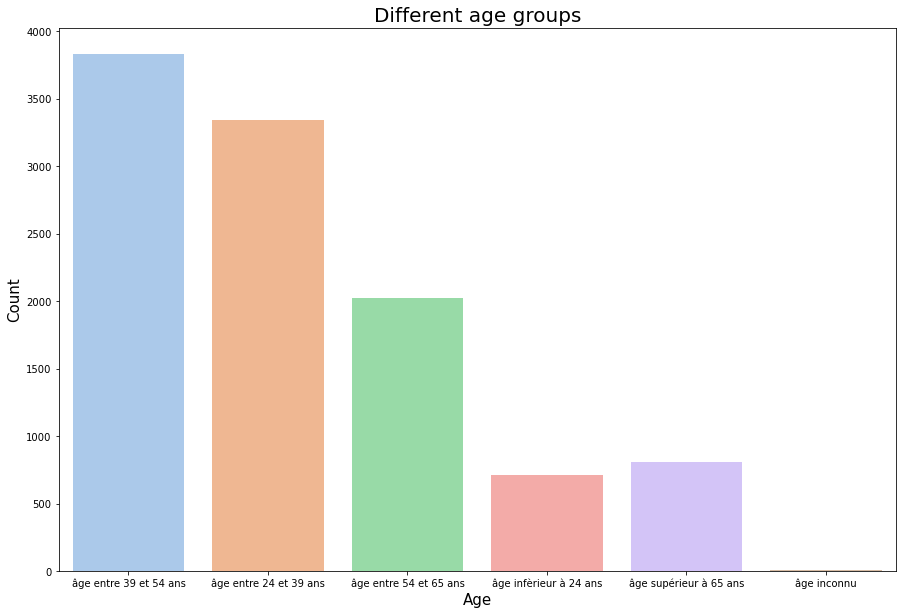

In [16]:
plt.figure(figsize=(15,10))
g = sns.countplot(x='AGE', data=data,palette='pastel')
g.set_title("Different age groups",fontsize=20)
g.set_xlabel("Age",fontsize=15)
g.set_ylabel("Count",fontsize=15)

# Tableaux de contingence

In [81]:
data.groupby(['SEXE','AGE','REVENU'])['REVENU'].count()


SEXE   AGE                     REVENU         
Femme  âge entre 24 et 39 ans  Entre 50 et 100     459
                               Inconnu             153
                               Inférieur à 50      369
                               Plus que 100         90
       âge entre 39 et 54 ans  Entre 50 et 100     279
                               Inconnu              54
                               Inférieur à 50      171
                               Plus que 100        180
       âge entre 54 et 65 ans  Entre 50 et 100     180
                               Inconnu              81
                               Inférieur à 50       72
                               Plus que 100         63
       âge infèrieur à 24 ans  Entre 50 et 100       9
                               Inconnu              99
                               Inférieur à 50      180
       âge supérieur à 65 ans  Entre 50 et 100      36
                               Inconnu              72
                  

In [19]:
data.groupby(['REVENU','SEXE','CHOICE'])['SEXE'].count()

REVENU           SEXE   CHOICE 
Entre 50 et 100  Femme  SM          572
                        Train       126
                        VP          265
                 Homme  SM         1583
                        Train       239
                        VP          959
Inconnu          Femme  Inconnu       9
                        SM          234
                        Train       166
                        VP           50
                 Homme  SM          251
                        Train       103
                        VP          105
Inférieur à 50   Femme  SM          475
                        Train       291
                        VP          143
                 Homme  SM          637
                        Train       229
                        VP          250
Plus que 100     Femme  SM          217
                        Train        45
                        VP           89
                 Homme  SM         2247
                        Train       224
        

# MATRICE DES CORRELATIONS

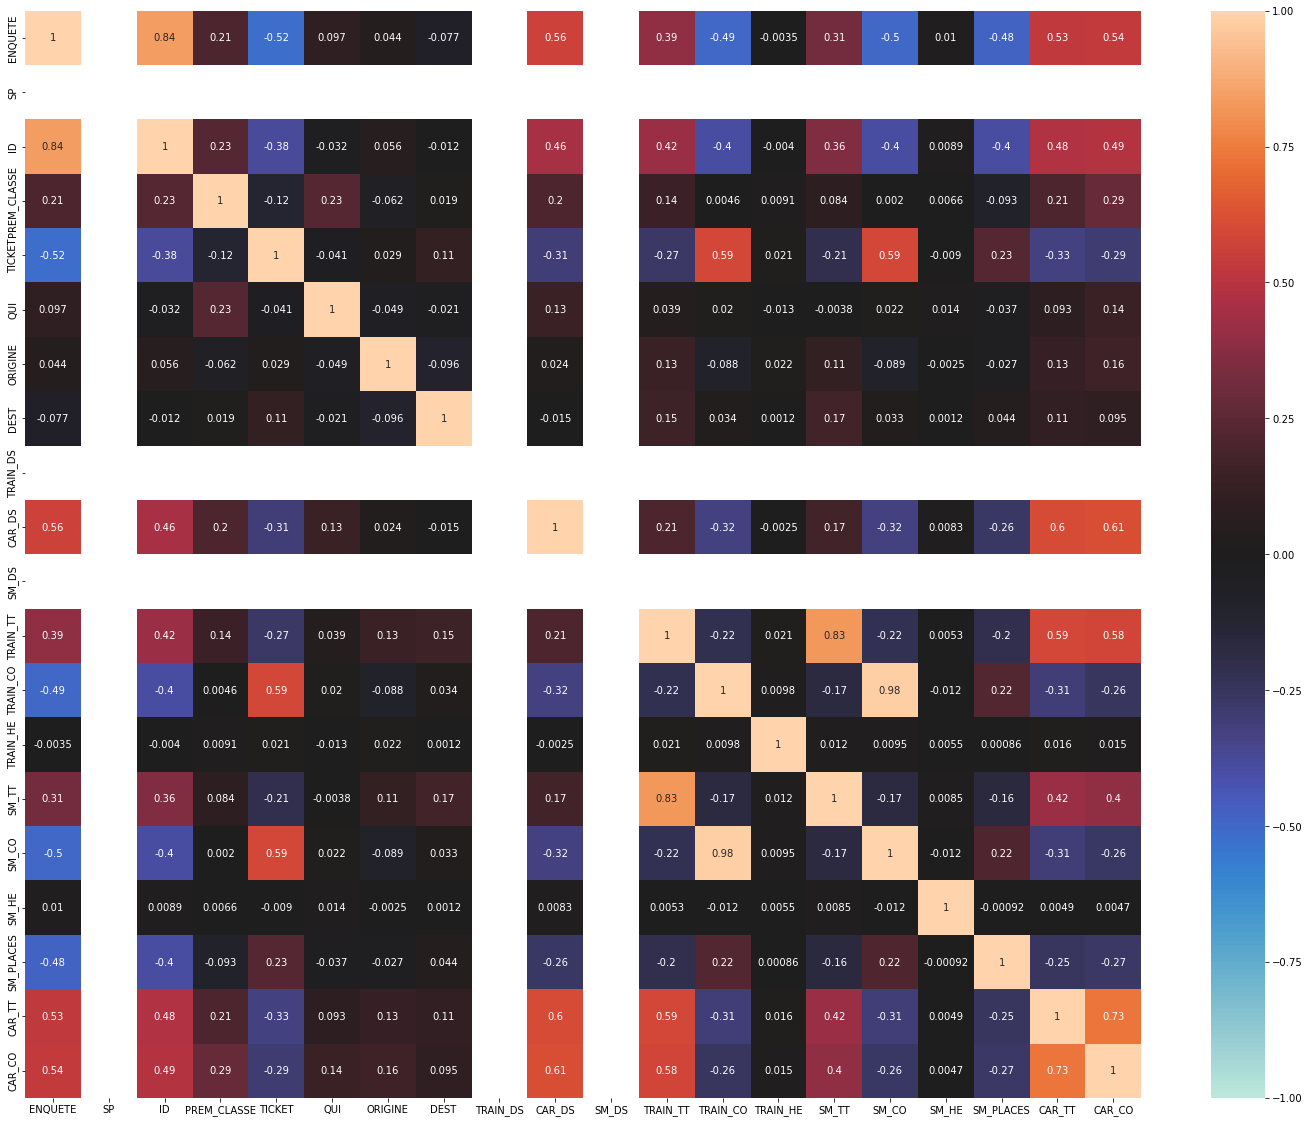

In [20]:
plt.figure(figsize=(25,20))
corr = data.corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

In [21]:
df.corr('kendall')

,AGE,SEXE,REVENU
AGE,1.000000,0.107875,0.124073
SEXE,0.107875,1.000000,0.146457
REVENU,0.124073,0.146457,1.000000


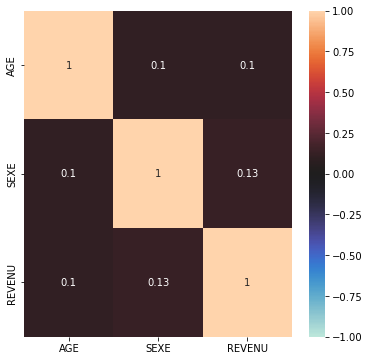

In [75]:
plt.figure(figsize=(6,6))
corr = df.corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

In [23]:
dt.corr('kendall')

,AGE,SEXE,REVENU,MOTIF,CHOICE,GROUPE,BAGAGES,ABONNEMENT
AGE,1.000000,0.107875,0.124073,0.133408,0.096317,0.202481,-0.084686,-0.106099
SEXE,0.107875,1.000000,0.146457,0.035382,0.159195,0.340095,-0.166932,-0.115249
REVENU,0.124073,0.146457,1.000000,-0.043989,0.045396,0.085896,-0.025896,-0.050633
MOTIF,0.133408,0.035382,-0.043989,1.000000,0.162301,0.328297,-0.065802,-0.188137
CHOICE,0.096317,0.159195,0.045396,0.162301,1.000000,0.461593,-0.156680,-0.324399
GROUPE,0.202481,0.340095,0.085896,0.328297,0.461593,1.000000,-0.422132,-0.530403
BAGAGES,-0.084686,-0.166932,-0.025896,-0.065802,-0.156680,-0.422132,1.000000,0.251654
ABONNEMENT,-0.106099,-0.115249,-0.050633,-0.188137,-0.324399,-0.530403,0.251654,1.000000


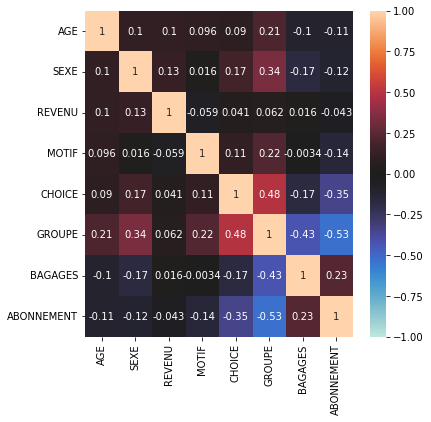

In [76]:
plt.figure(figsize=(6,6))
corr = dt.corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

# TEST KHI-DEUX

In [25]:
data_count = pandas.crosstab(data.AGE, data.SEXE)
data_count

SEXE,Femme,Homme
AGE,,
âge entre 24 et 39 ans,1071,2268
âge entre 39 et 54 ans,684,3150
âge entre 54 et 65 ans,396,1629
âge inconnu,0,9
âge infèrieur à 24 ans,288,423
âge supérieur à 65 ans,243,567


<AxesSubplot:xlabel='AGE', ylabel='count'>

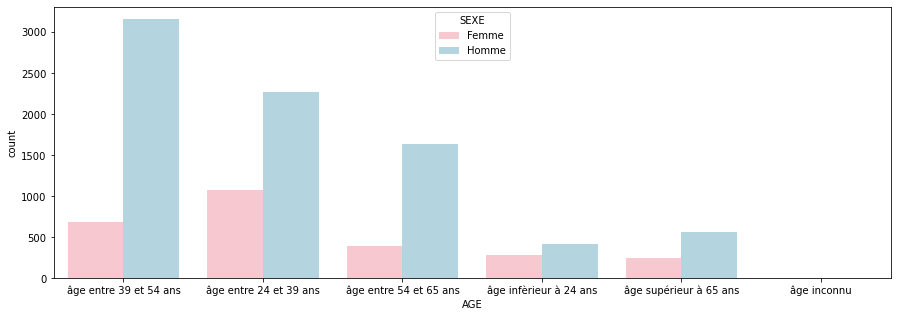

In [74]:
plt.figure(figsize = (15, 5))
sns.countplot(x='AGE', palette = ['pink','lightblue'], 
              hue='SEXE', data=data, fill = True)

In [27]:
from scipy.stats import chi2_contingency
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(data_count)

In [28]:
Khi2_obs

330.9583933278838

In [29]:
p_value

2.1963808128621923e-69

In [30]:
ddl

5

In [66]:
data1_count = pandas.crosstab(data.REVENU,data.AGE,normalize='all', margins=True).style.format("{:.0%}")
data1_count

AGE,âge entre 24 et 39 ans,âge entre 39 et 54 ans,âge entre 54 et 65 ans,âge inconnu,âge infèrieur à 24 ans,âge supérieur à 65 ans,All
REVENU,,,,,,,
Entre 50 et 100,14%,11%,7%,0%,1%,2%,35%
Inconnu,3%,1%,1%,0%,2%,1%,9%
Inférieur à 50,6%,4%,2%,0%,4%,3%,19%
Plus que 100,7%,20%,9%,0%,0%,2%,38%
All,31%,36%,19%,0%,7%,8%,100%


<AxesSubplot:xlabel='REVENU', ylabel='count'>

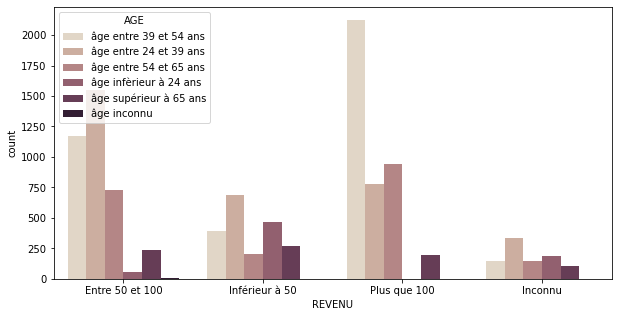

In [72]:
plt.figure(figsize = (10, 5))
sns.countplot(x='REVENU', hue='AGE', data=data, fill = True, palette="ch:.25")


In [33]:
from scipy.stats import chi2_contingency
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(data1_count)

In [34]:
p_value

0.0

In [35]:
data2_count = pandas.crosstab(data.REVENU,data.SEXE)
data2_count

SEXE,Femme,Homme
REVENU,,
Entre 50 et 100,963,2781
Inconnu,459,459
Inférieur à 50,909,1116
Plus que 100,351,3690


<AxesSubplot:xlabel='REVENU', ylabel='count'>

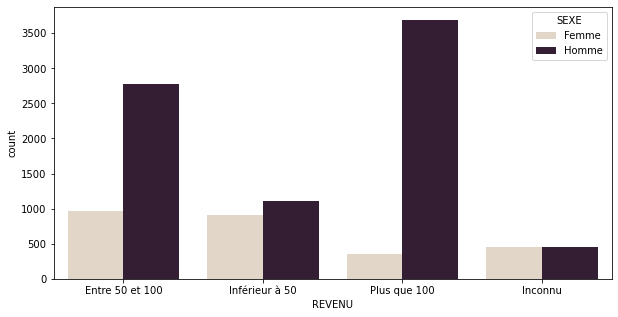

In [73]:
plt.figure(figsize = (10, 5))
sns.countplot(x='REVENU', hue='SEXE', data=data, fill = True, palette="ch:.25")


In [36]:
from scipy.stats import chi2_contingency
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(data2_count)

In [37]:
p_value

2.909726918953616e-283

In [78]:
data3_count = pandas.crosstab(data.AGE, [data.SEXE, data.REVENU])
data3_count

SEXE                             Femme                                      \
REVENU                 Entre 50 et 100 Inconnu Inférieur à 50 Plus que 100   
AGE                                                                          
âge entre 24 et 39 ans             459     153            369           90   
âge entre 39 et 54 ans             279      54            171          180   
âge entre 54 et 65 ans             180      81             72           63   
âge inconnu                          0       0              0            0   
âge infèrieur à 24 ans               9      99            180            0   
âge supérieur à 65 ans              36      72            117           18   

SEXE                             Homme                                      
REVENU                 Entre 50 et 100 Inconnu Inférieur à 50 Plus que 100  
AGE                                                                         
âge entre 24 et 39 ans            1089     180            315          684  
âge entre 39 et 54 ans             891      90            225         1944  
âge entre 54 et 65 ans             549      63            135          882  
âge inconnu                          9       0              0            0  
âge infèrieur à 24 ans              45      90            288            0  
âge supérieur à 65 ans             198      36            153          180

In [79]:
from scipy.stats import chi2_contingency
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(data3_count)

In [80]:
p_value

0.0

# Pandas Profiling

In [61]:
import pandas as pd
from pandas_profiling import ProfileReport

In [62]:
prof = ProfileReport(data)
prof.to_file(output_file='rapport.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]